<a href="https://colab.research.google.com/github/DasoTD/ML-MNIST-Image-classifier/blob/main/ML_mnist_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
print("ML Image Denoising")

ML Image Denoising


In [53]:
import sys

assert sys.version_info >= (3, 7)

In [54]:
from packaging import version
import sklearn
import matplotlib.pyplot as plt


assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

**Getting Data**

In [55]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [56]:
x, y = mnist.data , mnist.target

In [57]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [58]:
x.shape

(70000, 784)

In [59]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [60]:
y.shape

(70000,)

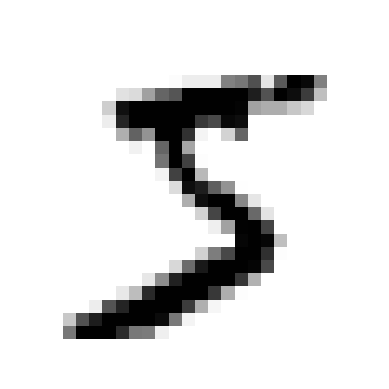

In [61]:
def plot_digit(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

some_digit=x[0]
plot_digit(some_digit)
plt.show()

In [62]:
y[0]

'5'

In [63]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [64]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [66]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [67]:
y_train_4 = (y_train == '4')
y_test_4 = (y_test == '4')

In [68]:
from sklearn.linear_model import SGDClassifier

In [69]:
sgd_clf = SGDClassifier()

In [70]:
sgd_clf.fit(x_train, y_train_4)

SGDClassifier()

In [71]:
value4 = x[2]
sgd_clf.predict([value4])

array([ True])

# **Performance Measurement**

In [79]:
from sklearn.model_selection import cross_val_score , cross_val_predict
cross_val_score(sgd_clf, x_train, y_train_4, cv=3, scoring="accuracy")

array([0.9771 , 0.97225, 0.9768 ])

In [74]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()

In [75]:
dummy_clf.fit(x_train, y_train_4)

DummyClassifier()

In [76]:
print(any(dummy_clf.predict(x_train)))

False


In [78]:
cross_val_score(dummy_clf, x_train, y_train_4, cv=3, scoring="accuracy")

array([0.90265, 0.90265, 0.9026 ])

In [80]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_4, cv=3)

In [85]:
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve
cm = confusion_matrix(y_train_4, y_train_pred)

In [82]:
cm

array([[52899,  1259],
       [  485,  5357]])

In [84]:
f1_score(y_train_4, y_train_pred)

0.8600096323647456

In [87]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_4, cv=3 , method="decision_function")

In [93]:
precisions, recalls, thresholds = precision_recall_curve(y_train_4, y_scores)

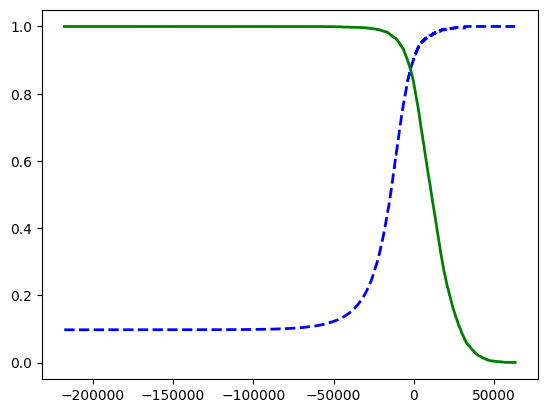

In [99]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
# plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")